# Nuclear Power Plants

## Problem Statement:
### To identify countries where there is significant opportunity for growth in nuclear power generation. This will be done by evaluating the current operational capacities against energy needs, while also considering ecological and societal factors.

In [50]:
#import main libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import MousePosition
from folium.plugins import MeasureControl
import os




In [51]:
#import the dataset
df = pd.read_csv('Data/nuclear_power_plants.csv')
df.head()

,Id,Name,Latitude,Longitude,Country,CountryCode,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,IAEAId
0,1,Ågesta,59.206000,18.08290,Sweden,SE,Shutdown,PHWR,NaN,1957-12-01,1964-05-01,1974-06-02,9.0,2015-05-24T04:51:37+03:00,WNA/IAEA,528.0
1,2,Akademik Lomonosov-1,69.709579,170.30625,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,NaN,30.0,2021-05-31,WNA/IAEA/Google Maps,895.0
2,3,Akademik Lomonosov-2,69.709579,170.30625,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,NaN,30.0,2021-05-31,WNA/IAEA/Google Maps,896.0
3,4,Akhvaz-1,NaN,NaN,Iran,IR,Planned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNA,NaN
4,5,Akhvaz-2,NaN,NaN,Iran,IR,Planned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNA,NaN


**Data Columns Key**

- id - numeric id key
- name - nuclear power plant name
- latitude - latitude in decimal format
- longitude - longitude in decimal format
- country_code - ISO 3166-1 alpha-2 country code
- status_id - nuclear power plant status id
- reactor_type_id - nuclear reactor type id
- reactor_model - nuclear reactor model
- construction_start_at - date when nuclear power plant construction was started
- operational_from - date when nuclear power plant became operational (also known as commercial operation date)
- operational_to - date when nuclear power plant was shutdown (also known as permanent shutdown date)
- capacity - nuclear power plant capacity (design net capacity in MWe) (see note)
- source - source of the information
- last_updated_at - date and time when information was last updated
- iaea_id - IAEA PRIS reactor id (International Atomic Energy Agency Power Reactor Information System)

In [52]:
df.shape

(803, 16)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   803 non-null    int64  
 1   Name                 803 non-null    object 
 2   Latitude             759 non-null    float64
 3   Longitude            759 non-null    float64
 4   Country              803 non-null    object 
 5   CountryCode          803 non-null    object 
 6   Status               803 non-null    object 
 7   ReactorType          794 non-null    object 
 8   ReactorModel         713 non-null    object 
 9   ConstructionStartAt  722 non-null    object 
 10  OperationalFrom      636 non-null    object 
 11  OperationalTo        212 non-null    object 
 12  Capacity             724 non-null    float64
 13  LastUpdatedAt        733 non-null    object 
 14  Source               803 non-null    object 
 15  IAEAId               713 non-null    flo

In [54]:
# create a new dataframe for lattitude, longitude, name and country
df_1 = df[['Name', 'Country', 'Latitude', 'Longitude', 'Status', 'Capacity']]
df_1.head()

,Name,Country,Latitude,Longitude,Status,Capacity
0,Ågesta,Sweden,59.206000,18.08290,Shutdown,9.0
1,Akademik Lomonosov-1,Russia,69.709579,170.30625,Operational,30.0
2,Akademik Lomonosov-2,Russia,69.709579,170.30625,Operational,30.0
3,Akhvaz-1,Iran,NaN,NaN,Planned,NaN
4,Akhvaz-2,Iran,NaN,NaN,Planned,NaN


In [55]:
# identify missing values
df_1.isnull().sum()

Name          0
Country       0
Latitude     44
Longitude    44
Status        0
Capacity     79
dtype: int64

In [56]:
# get current mean of capacity
df_1['Capacity'].mean()

778.4198895027624

In [57]:
# inpute missing values for capacity (will not effect mean as we are imputing the mean for the missing values)
df_1['Capacity'].fillna(df_1['Capacity'].mean(), inplace=True)
df_1.isnull().sum()

C:\Users\Ramon\AppData\Local\Temp\ipykernel_1192\4038473216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Capacity'].fillna(df_1['Capacity'].mean(), inplace=True)


Name          0
Country       0
Latitude     44
Longitude    44
Status        0
Capacity      0
dtype: int64

In [58]:
# create a list of only entries with missing values for latitude and longitude and save as a new dataframe
df_missing = df_1[df_1['Latitude'].isnull()]
df_missing.head()

,Name,Country,Latitude,Longitude,Status,Capacity
3,Akhvaz-1,Iran,NaN,NaN,Planned,778.41989
4,Akhvaz-2,Iran,NaN,NaN,Planned,778.41989
33,Chutka-1,India,NaN,NaN,Planned,778.41989
34,Chutka-2,India,NaN,NaN,Planned,778.41989
316,Hongshiding-1 (Rushan-1),China,NaN,NaN,Planned,778.41989


In [97]:
# create new dataframe excluding missing values
df_map = df_1.dropna(axis=0, how='any')
df_map.head()


,Name,Country,Latitude,Longitude,Status,Capacity
0,Ågesta,Sweden,59.206000,18.082900,Shutdown,9.0
1,Akademik Lomonosov-1,Russia,69.709579,170.306250,Operational,30.0
2,Akademik Lomonosov-2,Russia,69.709579,170.306250,Operational,30.0
5,Akkuyu-1,Türkiye,36.144444,33.541111,Under Construction,1114.0
6,Akkuyu-2,Türkiye,36.144444,33.541111,Under Construction,1114.0


In [60]:
# get unique values for status
df_map['Status'].unique()

array(['Shutdown', 'Operational', 'Under Construction', 'Planned',
       'Cancelled Construction', 'Suspended Construction', 'Unknown',
       'Decommissioning Completed', 'Suspended Operation',
       'Never Commissioned'], dtype=object)

In [61]:
# Mapping countries to continents
country_to_continent = {
    'Sweden': 'Europe', 'Russia': 'Asia', 'Türkiye': 'Asia',
    'Kazakhstan': 'Asia', 'Spain': 'Europe', 'Brazil': 'South America',
    'United States': 'North America', 'Armenia': 'Asia', 'Argentina': 'South America',
    'United Arab Emirates': 'Asia', 'Belarus': 'Europe', 'Bulgaria': 'Europe',
    'France': 'Europe', 'United Kingdom': 'Europe', 'Switzerland': 'Europe',
    'Germany': 'Europe', 'Slovakia': 'Europe', 'Netherlands': 'Europe',
    'Belgium': 'Europe', 'Canada': 'North America', 'Iran': 'Asia',
    'Italy': 'Europe', 'China': 'Asia', 'Romania': 'Europe', 'Pakistan': 'Asia',
    'Ukraine': 'Europe', 'Taiwan': 'Asia', 'Czechia': 'Europe', 'Egypt': 'Africa',
    'Japan': 'Asia', 'South Korea': 'Asia', 'Lithuania': 'Europe', 'India': 'Asia',
    'South Africa': 'Africa', 'Slovenia': 'Europe', 'Mexico': 'North America',
    'Finland': 'Europe', 'Hungary': 'Europe', 'Bangladesh': 'Asia', 'Austria': 'Europe'
}

# Add 'Continent' column to df_map
df_map['Continent'] = df_map['Country'].map(country_to_continent)

df_map.head()

C:\Users\Ramon\AppData\Local\Temp\ipykernel_1192\4243582891.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['Continent'] = df_map['Country'].map(country_to_continent)


,Name,Country,Latitude,Longitude,Status,Capacity,Continent
0,Ågesta,Sweden,59.206000,18.082900,Shutdown,9.0,Europe
1,Akademik Lomonosov-1,Russia,69.709579,170.306250,Operational,30.0,Asia
2,Akademik Lomonosov-2,Russia,69.709579,170.306250,Operational,30.0,Asia
5,Akkuyu-1,Türkiye,36.144444,33.541111,Under Construction,1114.0,Asia
6,Akkuyu-2,Türkiye,36.144444,33.541111,Under Construction,1114.0,Asia


### Map of Nuclear Power Plants

In [62]:
# Create a Folium map
m = folium.Map(location=[40.4637, -3.7492], zoom_start=3)

# Add markers to the map
for index, row in df_map.iterrows():
    name = row['Name']
    country = row['Country']
    latitude = row['Latitude']
    longitude = row['Longitude']
    status = row['Status']
    capacity = row['Capacity']
    continent = row['Continent']

    marker_color = {
        'Operational': 'green',
        'Under Construction': 'yellow',
        'Planned': 'orange',
        'Cancelled Construction': 'red',
        'Suspended Construction': 'red',
        'Unknown': 'lightblue',
        'Suspended Operation': 'red',
        'Decommissioning Completed': 'red',
        'Never Commissioned': 'red',
        'Shutdown': 'red'
    }.get(status)

    marker = folium.Marker(
        [latitude, longitude], 
        tooltip=f"{name} ({country}, {continent}): {capacity} MWe, Status: {status}",
        icon=folium.Icon(color=marker_color)
    )
    marker.add_to(m)

m

C:\Users\Ramon\AppData\Local\Temp\ipykernel_1192\3575731106.py:30: UserWarning: color argument of Icon should be one of: {'white', 'green', 'pink', 'black', 'darkred', 'purple', 'gray', 'lightred', 'darkgreen', 'beige', 'orange', 'lightblue', 'blue', 'cadetblue', 'red', 'lightgray', 'lightgreen', 'darkpurple', 'darkblue'}.
  icon=folium.Icon(color=marker_color)


In [64]:
# # save map as html file
# m.save('all_nuclear_power_plants.html')

### Map of Operational Nuclear Power Plants

In [65]:
# plot map of nuclear power plants using folium
# Create a Folium map
m = folium.Map(location=[40.4637, -3.7492], zoom_start=3)

# Filter to only include operational sites
df_operational = df_map[df_map['Status'] == 'Operational']

# Add markers to the map
for index, row in df_operational.iterrows():
    name = row['Name']
    country = row['Country']
    latitude = row['Latitude']
    longitude = row['Longitude']
    status = row['Status']
    capacity = row['Capacity']
    continent = row['Continent']

    marker_color = {
        'Operational': 'green',
        'Under Construction': 'yellow',
        'Planned': 'orange',
        'Cancelled Construction': 'red',
        'Suspended Construction': 'red',
        'Unknown': 'lightblue',
        'Suspended Operation': 'red',
        'Decommissioning Completed': 'red',
        'Never Commissioned': 'red',
        'Shutdown': 'red'
    }.get(status)

    marker = folium.Marker(
        [latitude, longitude], 
        tooltip=f"{name} ({country}, {continent}): {capacity} MWe, Status: {status}",
        icon=folium.Icon(color=marker_color)
    )
    marker.add_to(m)

m


In [67]:
# # save map as html file
# m.save('operational_nuclear_power_plants.html')

### Heatmap of World Metro Areas

In [68]:
# import metropolitan areas dataset
df_metro = pd.read_csv('Data/metro_areas.csv')
df_metro.head()

,Rank,Metropolitan Zone,Longitude,Latitude
0,1,Tokyo,139.6917° E,35.6895° N
1,2,New York City,74.0059° W,40.7127° N
2,3,Delhi,77.2184° E,28.6139° N
3,4,São Paulo,-46.6369° W,-23.5484° S
4,5,Mexico City,-99.1272° W,19.4270° N


In [69]:
# Keep copies of original Longitude and Latitude columns
df_metro['Original_Longitude'] = df_metro['Longitude']
df_metro['Original_Latitude'] = df_metro['Latitude']

# Clean Longitude
df_metro['Longitude'] = df_metro['Longitude'].str.extract(r'(-?\d+.\d+)').astype(float)
df_metro['Longitude'] = df_metro.apply(lambda row: -row['Longitude'] if 'W' in row['Original_Longitude'] else row['Longitude'], axis=1)

# Clean Latitude
df_metro['Latitude'] = df_metro['Latitude'].str.extract(r'(-?\d+.\d+)').astype(float)
df_metro['Latitude'] = df_metro.apply(lambda row: -row['Latitude'] if 'S' in row['Original_Latitude'] else row['Latitude'], axis=1)

# Drop original columns
df_metro.drop(['Original_Longitude', 'Original_Latitude'], axis=1, inplace=True)

# Display cleaned DataFrame
df_metro.head()


,Rank,Metropolitan Zone,Longitude,Latitude
0,1,Tokyo,139.6917,35.6895
1,2,New York City,-74.0059,40.7127
2,3,Delhi,77.2184,28.6139
3,4,São Paulo,46.6369,23.5484
4,5,Mexico City,99.1272,19.4270


In [70]:
# Create a Folium map
m = folium.Map(location=[40.4637, -3.7492], zoom_start=3)

# Create a list of [lat, lon, value] for the heatmap
heat_data = [[row['Latitude'], row['Longitude'], row['Rank']] for index, row in df_metro.iterrows()]

# Create the heatmap layer
HeatMap(heat_data, min_opacity=0.5, max_zoom=18, max_val=float(df_metro['Rank'].max())).add_to(m)

# Show the map
m

C:\Users\Ramon\AppData\Local\Temp\ipykernel_1192\236924627.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, min_opacity=0.5, max_zoom=18, max_val=float(df_metro['Rank'].max())).add_to(m)


In [72]:
# # save map as html file
# m.save('world_metro_areas_heatmap.html')

### Map of Nuclear Power Plants with Heatmap of World Metro Areas

In [73]:
# Initialize the Folium map centered at [40.4637, -3.7492] with a starting zoom level of 3
m = folium.Map(location=[40.4637, -3.7492], zoom_start=3)

# Create a list containing the latitude, longitude, and 'Rank' for each row in df_metro
heat_data = [[row['Latitude'], row['Longitude'], row['Rank']] for index, row in df_metro.iterrows()]

# Add the HeatMap to the Folium map
HeatMap(heat_data, min_opacity=0.5, max_zoom=18, max_val=float(df_metro['Rank'].max())).add_to(m)

# Add markers for operational sites
df_operational = df_map[df_map['Status'] == 'Operational']
for index, row in df_operational.iterrows():
    name = row['Name']
    country = row['Country']
    latitude = row['Latitude']
    longitude = row['Longitude']
    status = row['Status']
    capacity = row['Capacity']
    continent = row['Continent']

    marker_color = {
        'Operational': 'green'
        # Add more status-color mappings if needed
    }.get(status, 'lightblue')  # Default color if status is not found in the dictionary

    marker = folium.Marker(
        [latitude, longitude],
        tooltip=f"{name} ({country}, {continent}): {capacity} MWe, Status: {status}",
        icon=folium.Icon(color=marker_color)
    )
    marker.add_to(m)

# Show the map
m

C:\Users\Ramon\AppData\Local\Temp\ipykernel_1192\2206513105.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, min_opacity=0.5, max_zoom=18, max_val=float(df_metro['Rank'].max())).add_to(m)


In [75]:
# # save map as html file
# m.save('operational_nuclear_power_plants_heatmap.html')

### Heatmap of US Metro Areas

In [76]:
# import us metropolitan areas dataset
df_us_metro = pd.read_csv('Data/US_metro.csv')
df_us_metro.head()

,Rank,Metropolitan Zone,Longitude,Latitude
0,1,New York-Newark-Jersey City,-74.0059,40.7127
1,2,Los Angeles-Long Beach-Anaheim,-118.2437,34.0522
2,3,Chicago-Naperville-Arlington Heights,-87.6298,41.8783
3,4,Dallas-Fort Worth-Arlington,-97.0312,32.7827
4,5,Philadelphia-Camden-Wilmington,-75.1364,39.9526


In [77]:
# Create a Folium map centered at [0, 0] with a starting zoom level of 2
m = folium.Map(location=[40, -90], zoom_start=4)

# Create a list containing the latitude, longitude, and 'Rank' for each row in df_us_metro
heat_data_us = [[row['Latitude'], row['Longitude'], row['Rank']] for index, row in df_us_metro.iterrows()]

# Add the HeatMap to the Folium map
HeatMap(heat_data_us, min_opacity=0.5, max_zoom=18, max_val=float(df_us_metro['Rank'].max())).add_to(m)

# Show the map
m


C:\Users\Ramon\AppData\Local\Temp\ipykernel_1192\747121186.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data_us, min_opacity=0.5, max_zoom=18, max_val=float(df_us_metro['Rank'].max())).add_to(m)


In [79]:
# # save US map as html file
# m.save('US_metro_areas_heatmap.html')

### Map of Nuclear Power Plants with Heatmap of US Metro Areas

In [80]:
# Create a Folium map centered at [40, -90] with a starting zoom level of 4
m = folium.Map(location=[40, -90], zoom_start=4)

# Create a list containing the latitude, longitude, and 'Rank' for each row in df_us_metro
heat_data_us = [[row['Latitude'], row['Longitude'], row['Rank']] for index, row in df_us_metro.iterrows()]

# Add the HeatMap to the Folium map
HeatMap(heat_data_us, min_opacity=0.5, max_zoom=18, max_val=float(df_us_metro['Rank'].max())).add_to(m)

# Filter to only include operational sites from df_map
df_operational = df_map[df_map['Status'] == 'Operational']

# Add markers to the map for operational sites
for index, row in df_operational.iterrows():
    name = row['Name']
    country = row['Country']
    latitude = row['Latitude']
    longitude = row['Longitude']
    status = row['Status']
    capacity = row['Capacity']
    continent = row['Continent']

    marker_color = {
        'Operational': 'green'
        # Add other statuses if needed
    }.get(status, 'lightblue')  # Default color

    marker = folium.Marker(
        [latitude, longitude],
        tooltip=f"{name} ({country}, {continent}): {capacity} MWe, Status: {status}",
        icon=folium.Icon(color=marker_color)
    )
    marker.add_to(m)

    # Add LatLngPopup
m.add_child(folium.LatLngPopup())

# Show the map
m


C:\Users\Ramon\AppData\Local\Temp\ipykernel_1192\1804186973.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data_us, min_opacity=0.5, max_zoom=18, max_val=float(df_us_metro['Rank'].max())).add_to(m)


In [82]:
# # save US map as html file
# m.save('operational_nuclear_power_plants_heatmap_US.html')

In [84]:
# find unique values for country
df_map['Country'].unique()

array(['Sweden', 'Russia', 'Türkiye', 'Kazakhstan', 'Spain', 'Brazil',
       'United States', 'Armenia', 'Argentina', 'United Arab Emirates',
       'Belarus', 'Bulgaria', 'France', 'United Kingdom', 'Switzerland',
       'Germany', 'Slovakia', 'Netherlands', 'Belgium', 'Canada', 'Iran',
       'Italy', 'China', 'Romania', 'Pakistan', 'Ukraine', 'Taiwan',
       'Czechia', 'Egypt', 'Japan', 'South Korea', 'Lithuania', 'India',
       'South Africa', 'Slovenia', 'Mexico', 'Finland', 'Hungary',
       'Bangladesh', 'Austria'], dtype=object)

In [85]:
# sum of unique values for country
df_map['Country'].nunique()

40

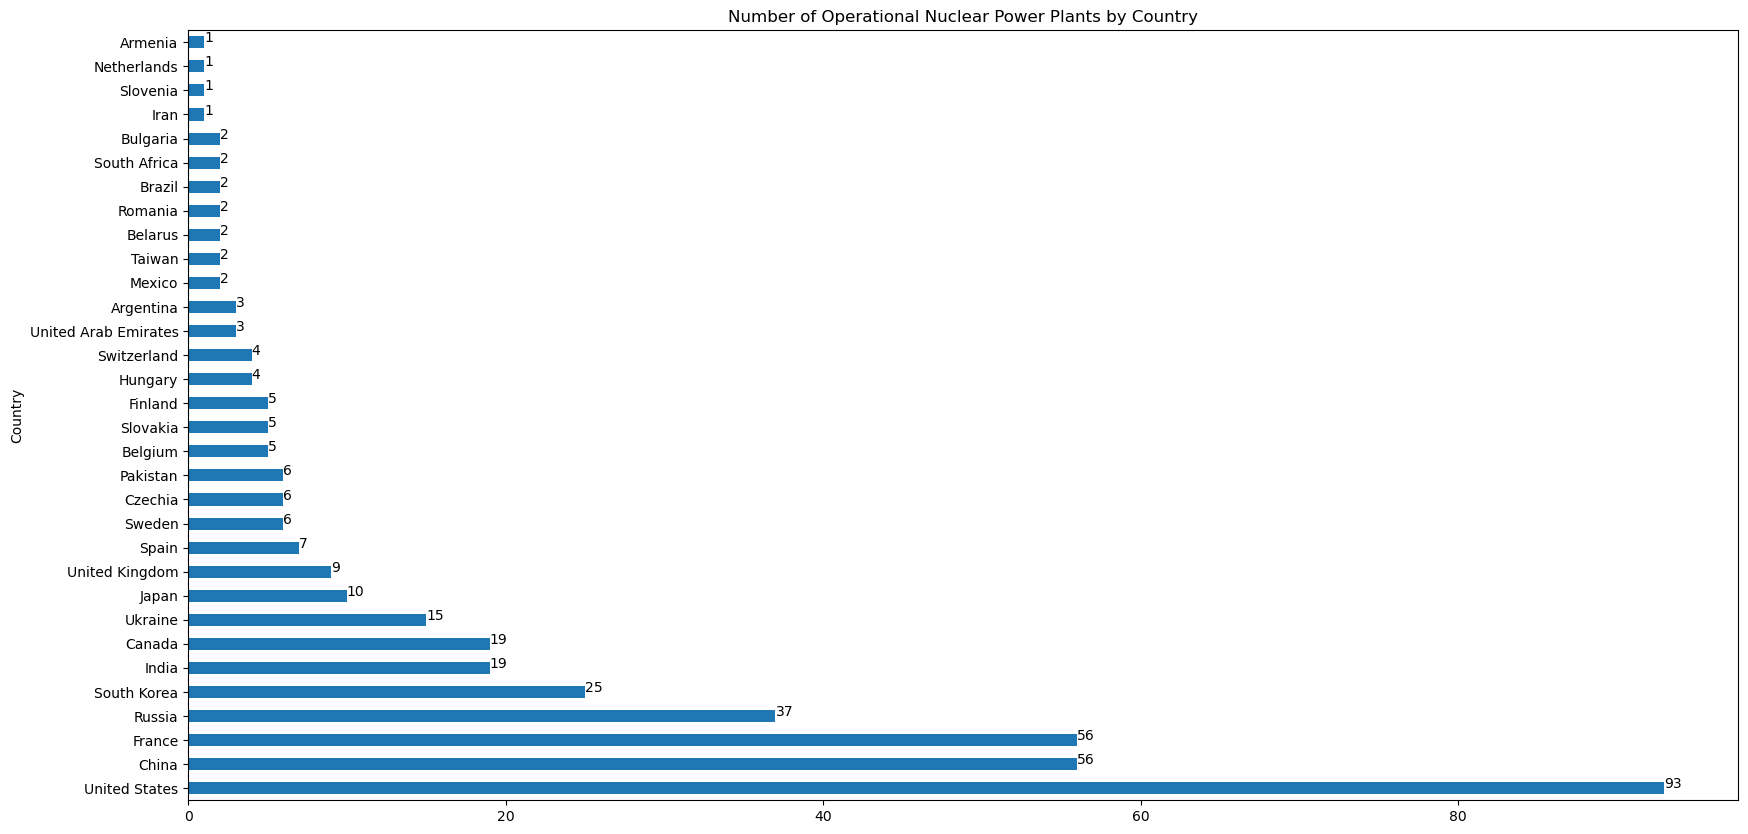

In [86]:
# plot the sum of operational nuclear power plants by country
# Filter to include only Operational power plants
df_map_operational = df_map[df_map['Status'] == 'Operational']

# Calculate the sum of operational nuclear power plants by country
country_counts_operational = df_map_operational['Country'].value_counts()

# Create the bar plot
ax = country_counts_operational.plot(kind='barh', figsize=(20, 10), title='Number of Operational Nuclear Power Plants by Country')

# Annotate each bar with the count value
for index, value in enumerate(country_counts_operational):
    ax.text(value, index, str(value))

# Show the plot
plt.show()


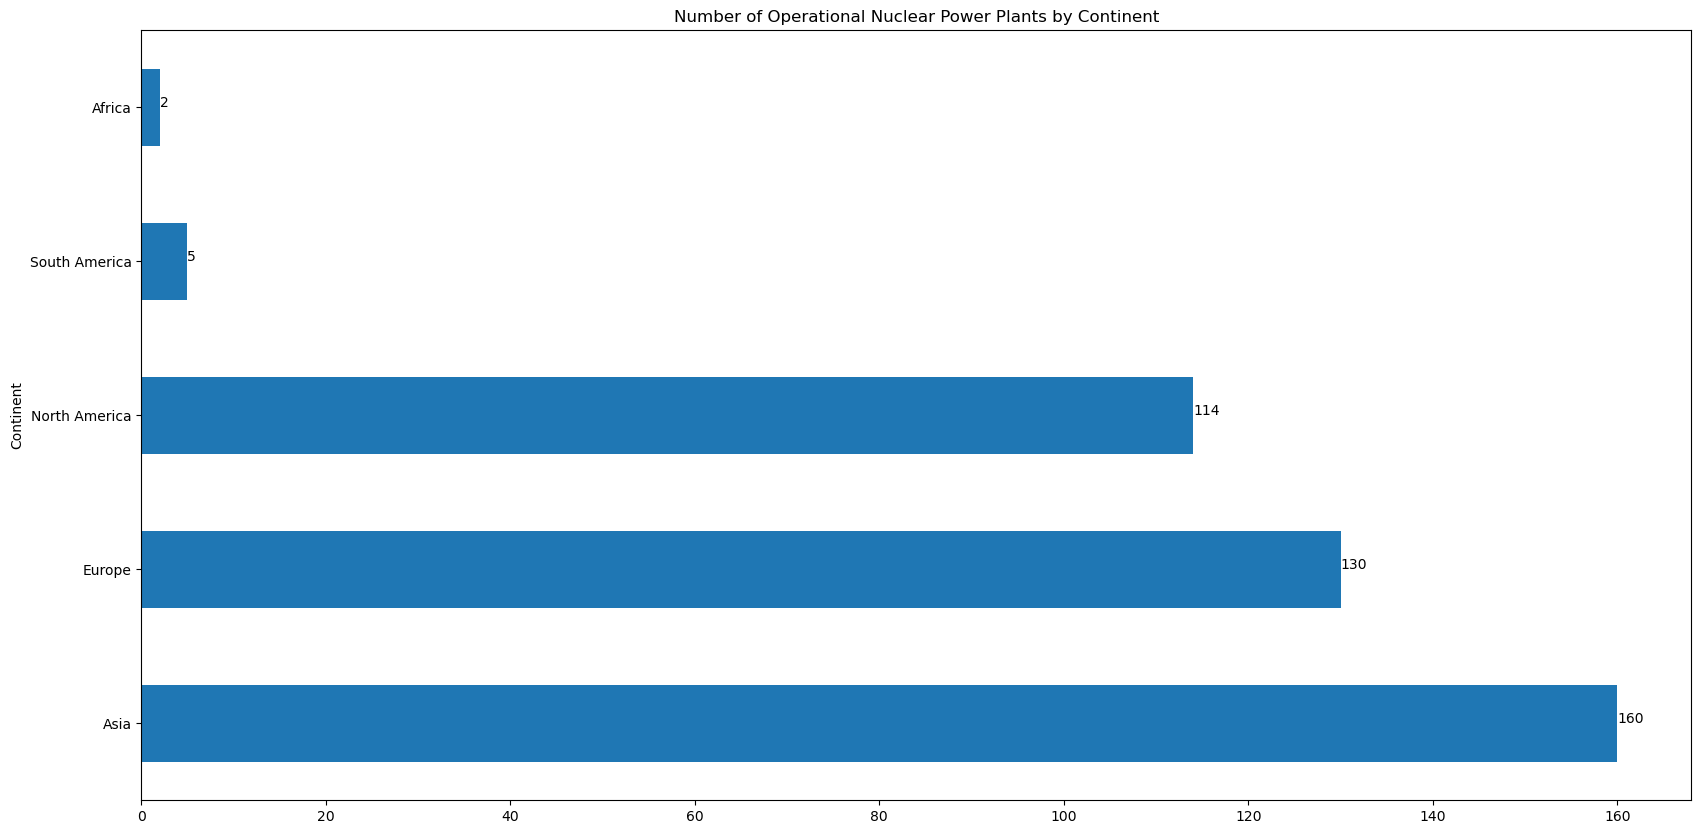

In [87]:
# plot the sum of operational nuclear power plants by continent
# Calculate the count of operational nuclear power plants by continent and sort
continent_count_operational = df_map_operational['Continent'].value_counts().sort_values(ascending=False)

# Create the bar plot
ax = continent_count_operational.plot(kind='barh', figsize=(20, 10), title='Number of Operational Nuclear Power Plants by Continent')

# Annotate each bar with the count value
for index, value in enumerate(continent_count_operational):
    ax.text(value, index, str(value))

# Show the plot
plt.show()

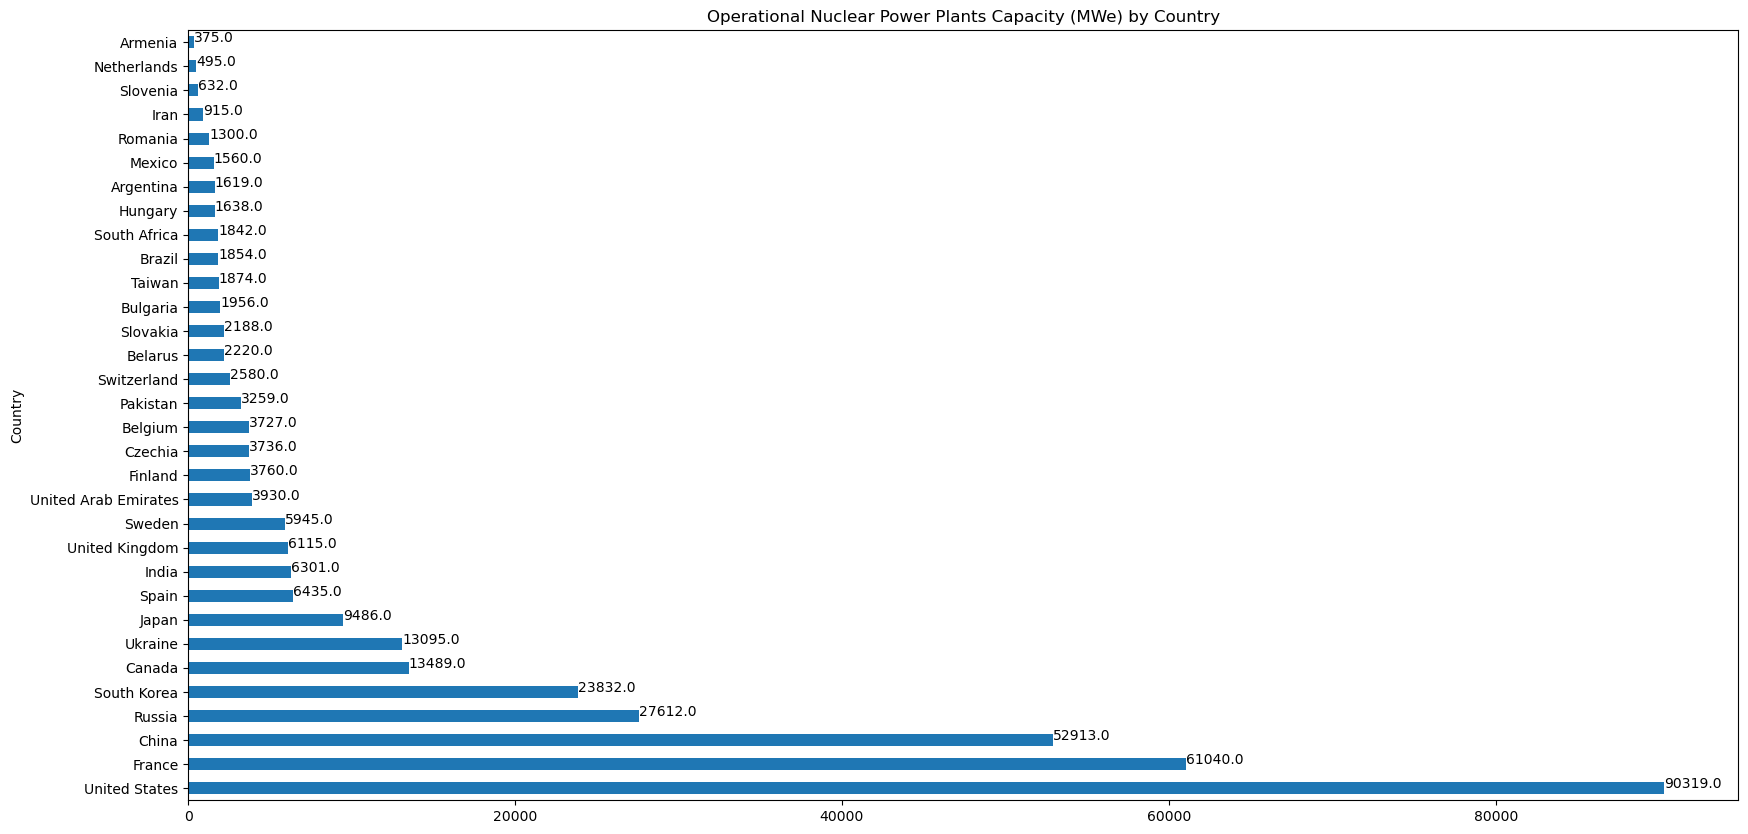

In [88]:
# plot nuclear power plants capacity by country
# Filter the DataFrame to only include Operational power plants
df_map_operational = df_map[df_map['Status'] == 'Operational']

# Calculate the sum of operational nuclear capacity by country and sort
country_capacity_operational = df_map_operational.groupby('Country')['Capacity'].sum().sort_values(ascending=False)

# Create the bar plot
ax = country_capacity_operational.plot(kind='barh', figsize=(20, 10), title='Operational Nuclear Power Plants Capacity (MWe) by Country')

# Annotate each bar with the capacity value
for index, value in enumerate(country_capacity_operational):
    ax.text(value, index, str(value))

# Show the plot
plt.show()

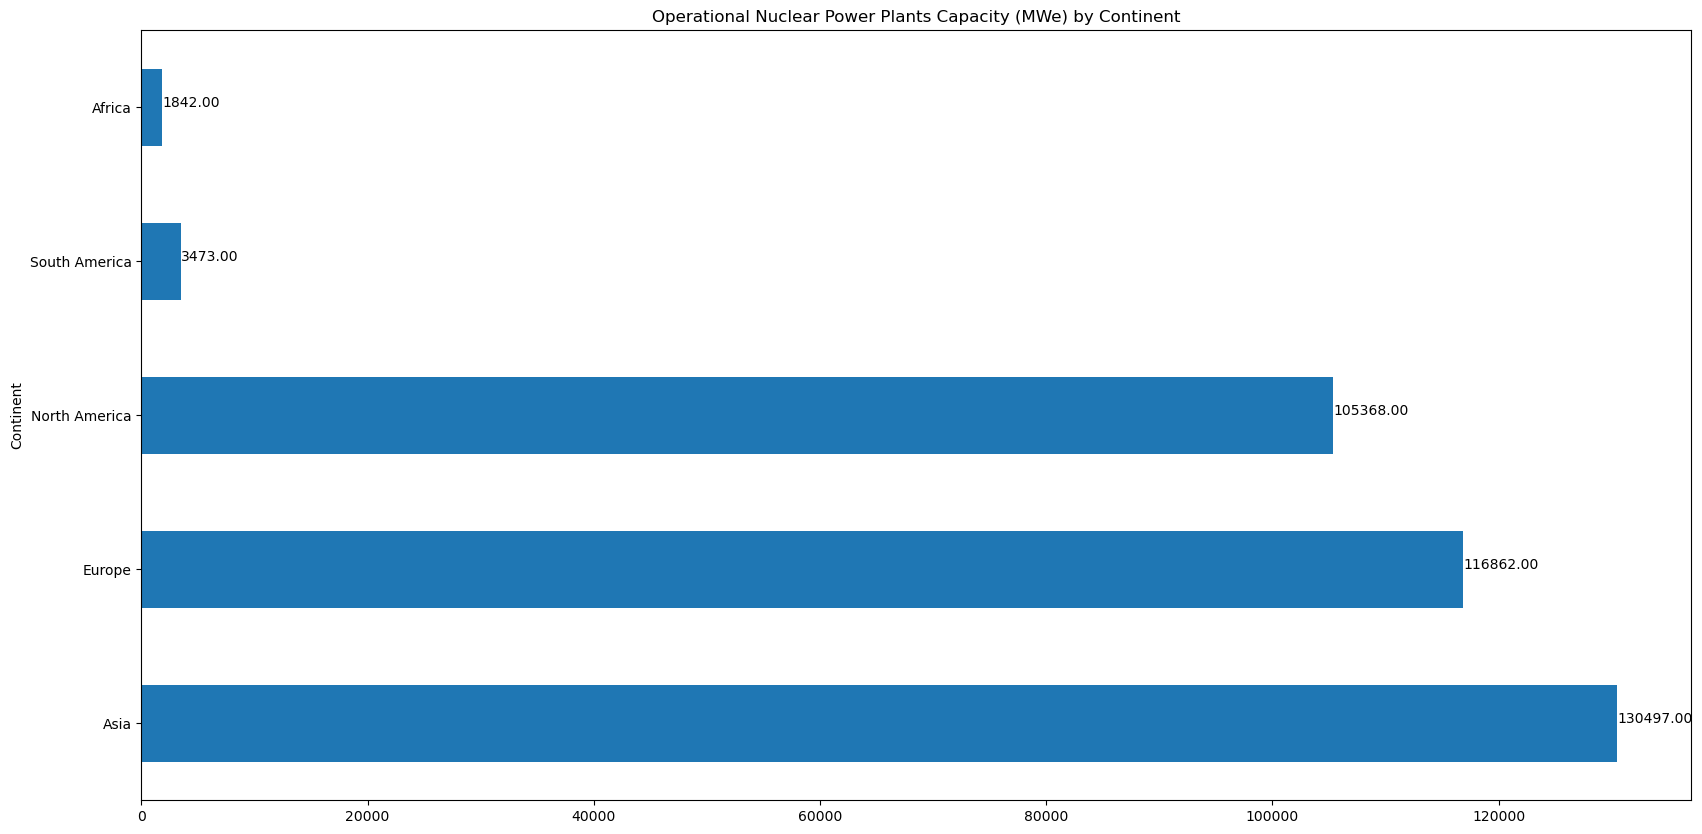

In [89]:
# plot nuclear power plants capacity by continent
# Calculate the sum of operational nuclear capacity by continent and sort
continent_capacity_operational = df_map_operational.groupby('Continent')['Capacity'].sum().sort_values(ascending=False)

# Create the bar plot
ax = continent_capacity_operational.plot(kind='barh', figsize=(20, 10), title='Operational Nuclear Power Plants Capacity (MWe) by Continent')

# Annotate each bar with the rounded capacity value
for index, value in enumerate(continent_capacity_operational):
    ax.text(value, index, f"{value:.2f}")

# Show the plot
plt.show()

In [90]:
#import population data
df_pop = pd.read_csv('pop_data.csv')
df_pop.head()

,Country,Population
0,Sweden,10400000
1,Russia,146200000
2,Türkiye,84300000
3,Kazakhstan,19100000
4,Spain,47400000


In [91]:
# merge population data with df_map on country
df_map_pop = pd.merge(df_map, df_pop, on='Country')
df_map_pop.head()

,Name,Country,Latitude,Longitude,Status,Capacity,Continent,Population
0,Ågesta,Sweden,59.206,18.0829,Shutdown,9.0,Europe,10400000
1,Barseback-1,Sweden,55.745,12.9260,Shutdown,570.0,Europe,10400000
2,Barseback-2,Sweden,55.745,12.9260,Shutdown,570.0,Europe,10400000
3,Forsmark-1,Sweden,60.405,18.1680,Operational,900.0,Europe,10400000
4,Forsmark-2,Sweden,60.405,18.1680,Operational,900.0,Europe,10400000


In [92]:
# # save df_map_pop as csv
# df_map_pop.to_csv('df_map_pop.csv', index=False)

MWe (Megawatts electrical) is a measure of the net electrical output capacity of a power plant at a given moment. To give a more practical perspective, we can convert this to kWh (Kilowatt-hours), which is a unit of energy. The conversion isn't directly one-to-one, but we can make an approximation for illustrative purposes.

1 Megawatt (MW) running for 1 hour produces 1 Megawatt-hour (MWh), which is equivalent to 1000 Kilowatt-hours (kWh).

Here's the conversion formula:

Capacity in kWh per capita = (Total Capacity in MWe × 1000) ÷ Population

In [93]:
# Filter the DataFrame to include only 'Operational' plants
df_operational = df_map_pop[df_map_pop['Status'] == 'Operational']

# Group by 'Country' and calculate the sum of 'Capacity' and the mean of 'Population'
grouped_operational_df = df_operational.groupby('Country').agg({'Capacity': 'sum', 'Population': 'mean'})

# Convert capacity from MWe to daily kWh (1 MWe = 1000 kWh and 24 hours in a day)
grouped_operational_df['Daily_Capacity_kWh'] = grouped_operational_df['Capacity'] * 1000 * 24

# Calculate daily capacity per capita in kWh
grouped_operational_df['Daily_Capacity_Per_Capita_kWh'] = grouped_operational_df['Daily_Capacity_kWh'] / grouped_operational_df['Population']

# Add a column to indicate if this daily capacity per capita is above or below 25 kWh
grouped_operational_df['Sufficient_For_25kWh_Per_Day'] = grouped_operational_df['Daily_Capacity_Per_Capita_kWh'] >= 25

grouped_operational_df[['Daily_Capacity_Per_Capita_kWh', 'Sufficient_For_25kWh_Per_Day']]
grouped_operational_df.head()

,Capacity,Population,Daily_Capacity_kWh,Daily_Capacity_Per_Capita_kWh,Sufficient_For_25kWh_Per_Day
Country,,,,,
Argentina,1619.0,47300000.0,38856000.0,0.821480,False
Armenia,375.0,3000000.0,9000000.0,3.000000,False
Belarus,2220.0,9400000.0,53280000.0,5.668085,False
Belgium,3727.0,11700000.0,89448000.0,7.645128,False
Brazil,1854.0,214500000.0,44496000.0,0.207441,False


In [94]:
# # save grouped_operational_df as csv
# grouped_operational_df.to_csv('grouped_operational_df.csv', index=True)

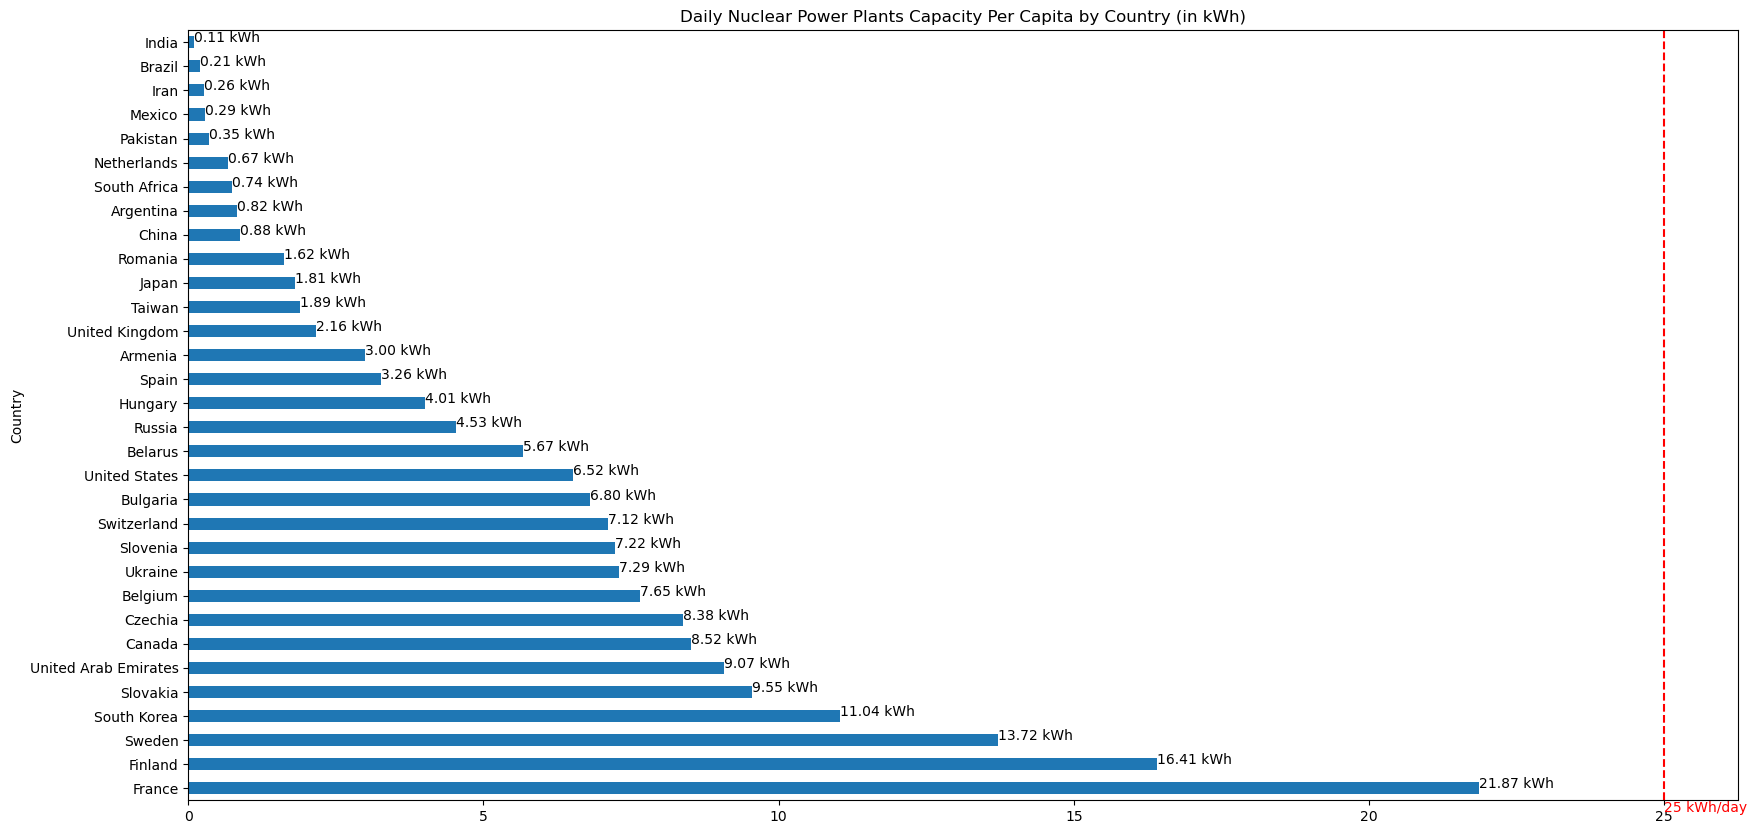

In [95]:
# Filter the DataFrame to include only 'Operational' plants
df_operational = df_map_pop[df_map_pop['Status'] == 'Operational']

# Group by 'Country' and calculate the sum of 'Capacity' and the mean of 'Population'
grouped_operational_df = df_operational.groupby('Country').agg({'Capacity': 'sum', 'Population': 'mean'})

# Convert capacity from MWe to daily kWh (1 MWe = 1000 kWh and 24 hours in a day)
grouped_operational_df['Daily_Capacity_kWh'] = grouped_operational_df['Capacity'] * 1000 * 24

# Calculate daily capacity per capita in kWh
grouped_operational_df['Daily_Capacity_Per_Capita_kWh'] = grouped_operational_df['Daily_Capacity_kWh'] / grouped_operational_df['Population']

# Create the bar plot for daily capacity per capita in kWh
ax = grouped_operational_df['Daily_Capacity_Per_Capita_kWh'].sort_values(ascending=False).plot(
    kind='barh', figsize=(20, 10), title='Daily Nuclear Power Plants Capacity Per Capita by Country (in kWh)')

# Annotate each bar with the rounded daily capacity per capita value in kWh
for index, value in enumerate(grouped_operational_df['Daily_Capacity_Per_Capita_kWh'].sort_values(ascending=False)):
    ax.text(value, index, f"{value:.2f} kWh")

# Add a vertical line to indicate the 25 kWh per day threshold
ax.axvline(x=25, color='r', linestyle='--')

# Annotate the 25 kWh per day threshold
ax.text(25, -1, '25 kWh/day', color='r')

# Show the plot
plt.show()

This chart gives a rough idea of how much more nuclear power we would need to meet the CURRENT daily demands per person

According to the International Energy Agency (IEA), the average electricity use per capita in OECD (Organisation for Economic Co-operation and Development) countries (which are mostly western countries) is 24.
6 kWh per day.

Here are some of the key characteristics of OECD countries:

- High levels of economic development
- Democratic political systems
- Market economies
- Open trade and investment regimes
- High levels of social welfare spending
- Commitment to sustainable development

Source:

International Energy Agency. (2022). Key World Energy Statistics 2022. Paris, France.

** Please note that this is just an average, and electricity use can vary significantly from country to country and within countries. For example, electricity use is higher in colder climates and in countries with more developed economies. **

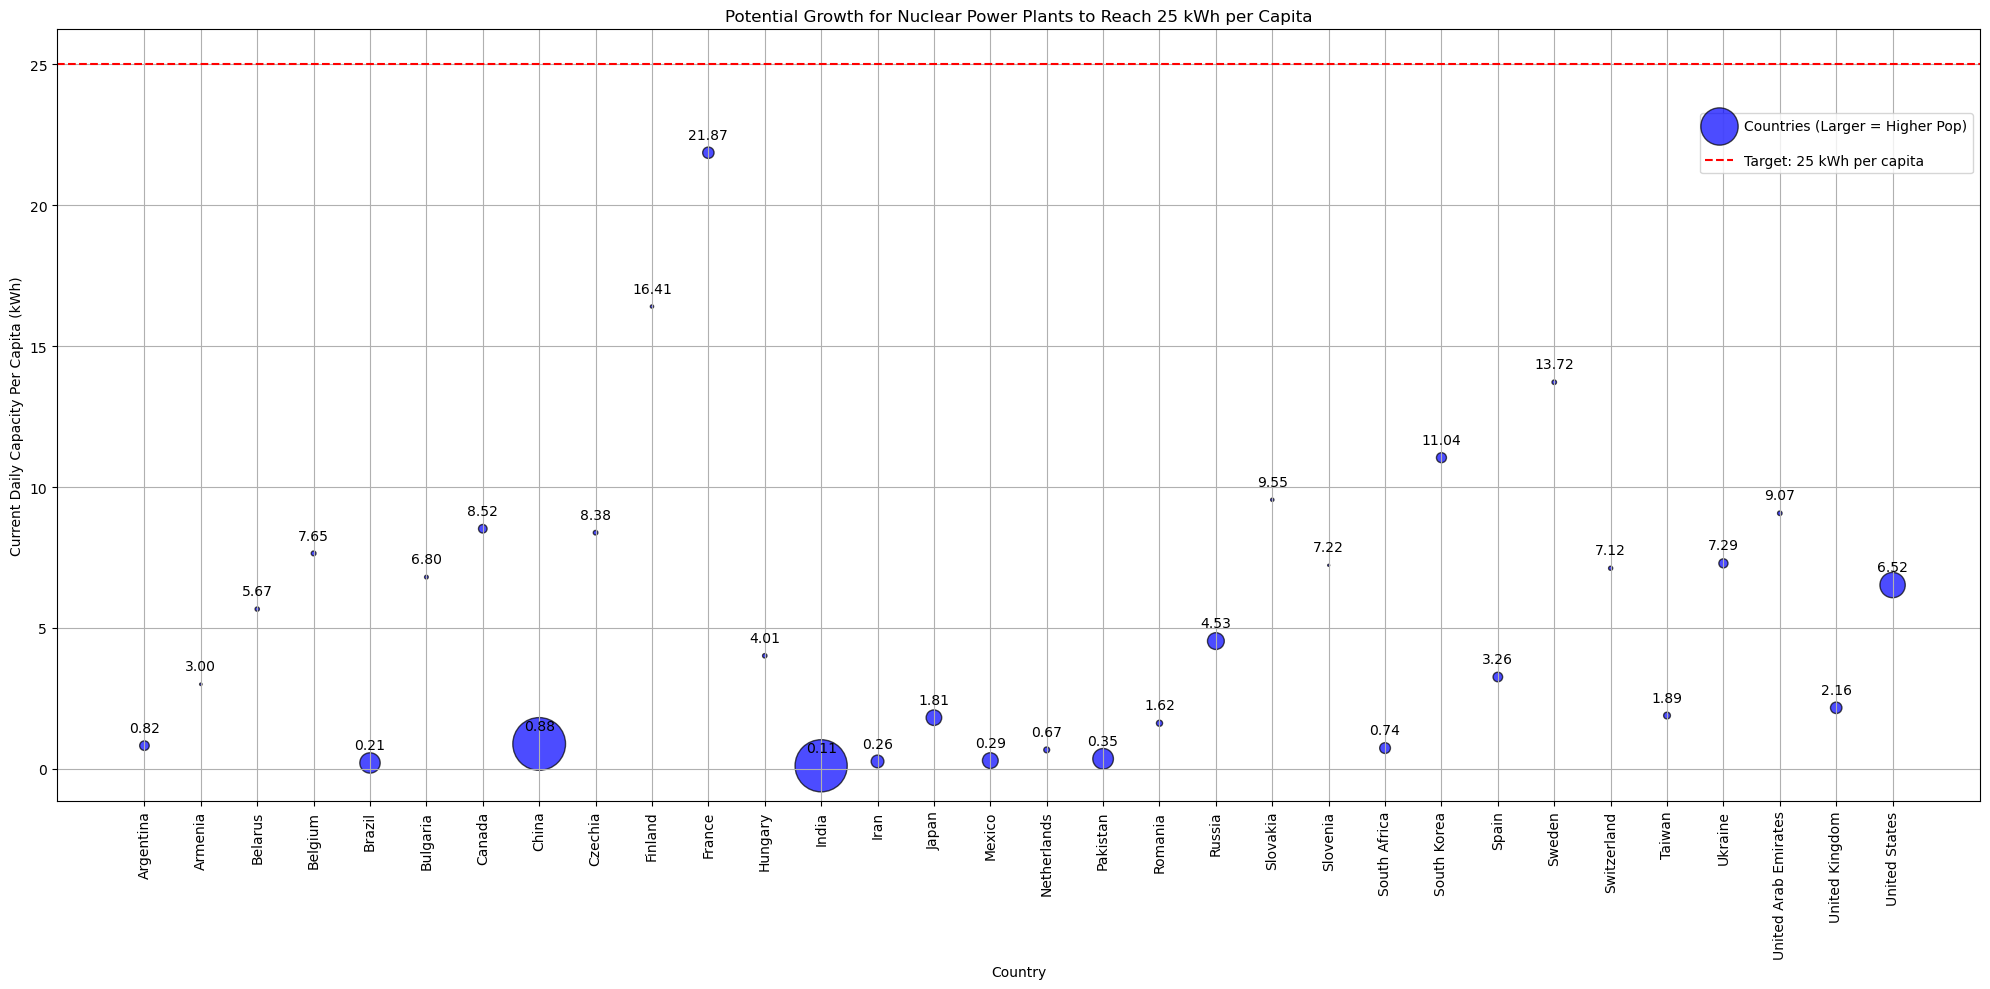

In [96]:
# Create bubble plot
plt.figure(figsize=(20, 10))
scatter = plt.scatter(grouped_operational_df.index, grouped_operational_df['Daily_Capacity_Per_Capita_kWh'],
            s=grouped_operational_df['Population'] / 1e6, alpha=0.7, c='blue', edgecolors='black', linewidths=1, label='Countries (Larger = Higher Pop)')
plt.axhline(25, color='r', linestyle='--', label='Target: 25 kWh per capita')
plt.xlabel('Country')
plt.ylabel('Current Daily Capacity Per Capita (kWh)')
plt.title('Potential Growth for Nuclear Power Plants to Reach 25 kWh per Capita')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate with current kWh instead of country names
for i, txt in enumerate(grouped_operational_df['Daily_Capacity_Per_Capita_kWh']):
    plt.annotate(f"{txt:.2f}", (i, txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9), labelspacing=1.5)
plt.tight_layout()
plt.show()
